# 성능지표 (모델 평가 기준)
[분류 평가기준]
-f1-score : 정밀도랑 재현율 조화 평균    
-accuracy : 몇 개를 제대로 맞추었는지 양성/음성 모두 판단    
-precision : 양성이라고 판단한 것 중에 실제 양성인 것 [예측모델 관점]    
-recall : 양성인 것을 얼마나 양성이라고 예측했는지 [정답 관점]    
-이진분류    
 : ROC/AUC    
-다중분류    
 : micro, macro, weight    
 
[회귀 평가기준]    
RMSE (Root Mean Squared Error): 예측값과 실제값 간의 평균 제곱근 오차     
MSE (Mean Squared Error): 예측값과 실제값 간의 제곱 오차의 평균     
MAE (Mean Absolute Error): 예측값과 실제값 간의 절대 오차의 평균     
R-squared (R^2): 모델이 실제 데이터의 변동을 설명하는 정도     
Adjusted R-squared: R-squared 값을 모델의 복잡도로 조정한 값     
Max Error: 예측값과 실제값 간의 최대 오차       

In [41]:
import torch
import torchmetrics.functional.classification as metrics
#from torochmetrics.classification import Accuracy, Precision, Recall, F1, ConfusionMatrix
import sklearn.metrics as skm
import numpy as np

target=torch.tensor([2,1,0,0])
preds=torch.tensor([2,1,0,1]) # 다중분류

In [42]:
metrics.confusion_matrix(preds, target, task='MULTICLASS', num_classes=3)

tensor([[1, 1, 0],
        [0, 1, 0],
        [0, 0, 1]])

In [43]:
# micro 옵션 : 타겟 데이터가 균형일 때 사용
precision = metrics.precision(preds, target, average='micro', task="multiclass", num_classes=3)
recall= metrics.recall(preds, target, average='micro', task="multiclass", num_classes=3)
f1= metrics.f1_score(preds, target, average='micro', task="multiclass", num_classes=3)
accuracy = metrics.accuracy(preds, target, average='micro', task="multiclass", num_classes=3)

In [44]:
print(f"precision : {precision}")
print(f"recall : {recall}")
print(f"f1 : {f1}")
print(f"accuracy : {accuracy}")

precision : 0.75
recall : 0.75
f1 : 0.75
accuracy : 0.75


In [45]:
# macro 옵션 : 타겟 데이터가 불균형일 때 사용
precision = metrics.precision(preds, target, average='macro', task="multiclass", num_classes=3)
recall= metrics.recall(preds, target, average='macro', task="multiclass", num_classes=3)
f1= metrics.f1_score(preds, target, average='macro', task="multiclass", num_classes=3)
accuracy = metrics.accuracy(preds, target, average='macro', task="multiclass", num_classes=3)

In [46]:
print(f"precision : {precision}")
print(f"recall : {recall}")
print(f"f1 : {f1}")
print(f"accuracy : {accuracy}")

precision : 0.8333333730697632
recall : 0.8333333730697632
f1 : 0.7777777910232544
accuracy : 0.8333333730697632


In [47]:
# sklearn으로도 평가 지표 살펴보기 
target=target.numpy() # tensor -> numpy
preds=preds.numpy()
skm.confusion_matrix(target, preds)

array([[1, 1, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=int64)

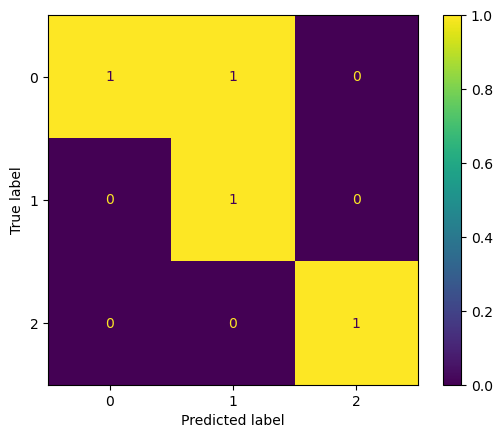

In [48]:
skm.ConfusionMatrixDisplay(skm.confusion_matrix(target, preds)).plot()

In [58]:
# 다중 분류 성능분석 출력
accuracy=skm.accuracy_score(target, preds)
precision = skm.precision_score(target, preds, average='micro')
recall = skm.recall_score(target, preds, average='micro')
f1 = skm.f1_score(target, preds, average='micro')
report = skm.classification_report(target, preds, target_names=['class 0', 'class 1', 'class 2'])

In [59]:
print(f"precision : {precision}")
print(f"recall : {recall}")
print(f"f1 : {f1}")
print(f"accuracy : {accuracy}")

precision : 0.75
recall : 0.75
f1 : 0.75
accuracy : 0.75


In [64]:
print(report)

              precision    recall  f1-score   support

     class 0       1.00      0.50      0.67         2
     class 1       0.50      1.00      0.67         1
     class 2       1.00      1.00      1.00         1

    accuracy                           0.75         4
   macro avg       0.83      0.83      0.78         4
weighted avg       0.88      0.75      0.75         4

